# 第一讲：Meta-分析（Meta-analysis）初步
___

Meta分析，中文也称为荟萃分析，Meta-在英文里面有后-的意义（如meta-genomics，后基因组时代)，同时Meta还有全面的意思。而Meta-analysis的意义就是采用统计学方法将不同研究的研究结果结合起来，进行分析的一种技术，是的，Meta分析是一种统计技术。

那么，meta分析到底要分析一些什么呢？

- 首先，不同研究必须研究的是相同的问题，比如，都是研究吸烟对癌症发病率的影响，研究某个突变对疾病发病率的影响，等等诸如此类。

- 其次，多个研究必须有相同的outcome，例如，二元变量如发病、死亡、复发等等，连续变量如血压、血糖等，研究的影响因素也必须相同。

- 不同研究之间可能存在异质性（Heterogeneity），比如存在诸如地区、人种等等在研究中未曾被考虑的confounding因素。

- 不同的研究所选择的样本量存在差异，不同的研究的实验设计、数据质量也存在差异。

而meta分析的目的，就是为了定量统计分析这些方面的问题对结果的影响。

## 1. Meta分析的研究策略

首先，我们必须计算汇总后的effect size，归根结底是要计算不同研究的effect size的加权平均值：
$$
\hat{\theta} = \frac{\sum_{k=1}^K w_k \hat{\theta}_k}{\sum_{k=1}^K w_k}
$$
其中$\hat{\theta}_k$是研究$k$的effect size，而$w_k$则是研究$k$的权重因子。不同的meta-analysis方法投射到这里，无非就是在计算权重的方法的差异（对于固定效应模型FEM和随机效应模型REM来说尤其如此）。

### 1.1 固定效应模型（Fixed effect model）

固定效应模型基于这样的假设：
> <font color="blue">不同的研究具有统一的效应值，产生的差异只是由于采样的误差造成。</font>

所以，固定效应模型可以认为是高斯分布的抽样结果所致。对研究$k$来说：
$$
\hat{\theta}_k = \theta + \hat{\sigma}_k \epsilon_k, 其中\epsilon_k \overset{i.i.d}{\sim} \mathcal{N}(0,1)
$$

这样固定效应模型的汇总效应值的__最大似然估计（MLE）__为：
$$
\hat{\theta}_F = \frac{\sum_{k=1}^K w_k \hat{\theta}_k}{\sum_{k=1}^K w_k} = \frac{\sum_{k=1}^K \hat{\theta}_k/\hat{\sigma}_k^2}{\sum_{k=1}^K 1/\hat{\sigma}_k^2}
$$
换言之：
$$
w_k = 1/\hat{\sigma}_k^2
$$

而$\hat{\theta}_F$的__方差__为：
$$
\widehat{\operatorname{var}}(\hat{\theta}_F) = \frac{1}{\sum_{k=1}^K w_k} = \frac{1}{\sum_{k=1}^K 1/\hat{\sigma}_k^2}
$$

其__$(1-\alpha)$置信区间__为：
$$
\hat{\theta}_F \pm \mathbf{Z}_{1-\alpha/2} \operatorname{S.E.}(\hat{\theta}_F)
$$
其中
$$
\operatorname{S.E.}(\hat{\theta}_F) = \sqrt{\widehat{\operatorname{var}}(\hat{\theta}_F)}
$$

### $\S$案例1： 侵袭性非霍奇金淋巴瘤的两种化疗方法的生存分析比较

让我们先来看一个例子，用R语言的`meta`包中的`metagen`函数（general）进行分析计算。

首先我们从文件中读入数据，文件的每一行都是一个研究的研究结果，这是比较侵袭性非霍奇金淋巴瘤的两种治疗方法-传统的化疗（conventional chemotherapy）和高剂量化疗（high-dose chemotherapy）的疗效，其效应值为$\log HR$，这里HR为hazard ratio。

In [2]:
library(meta)
os <- read.csv("data/hd-os.csv", as.is=TRUE)
str(os)

Loading 'meta' package (version 4.4-1).


'data.frame':	14 obs. of  6 variables:
 $ study  : chr  "De Souza" "Gianni" "Gisselbrecht" "Intragumtornchai" ...
 $ HR     : num  0.92 0.52 1.45 0.96 0.64 1.08 1.23 0.69 1.01 0.64 ...
 $ LB     : num  0.45 0.24 1.08 0.71 0.3 0.75 0.72 0.29 0.59 0.4 ...
 $ UB     : num  1.89 1.11 1.93 1.3 1.36 1.55 2.08 1.65 1.73 1.05 ...
 $ logHR  : num  -0.0807 -0.6527 0.3683 -0.0387 -0.448 ...
 $ selogHR: num  0.367 0.385 0.149 0.153 0.385 ...


我们可以看到，累计有14个研究，每个研究的效应值HR及其95%置信区间的下限与上限都已经给出，对数转换后的logHR和标准误差selogHR也给出了。这样我们就可以直接应用`metagen`函数进行计算固定效应模型：

In [6]:
meta1 <- metagen(logHR, selogHR,
                 sm="HR", studlab = study, data = os,
                 comb.random = FALSE)

In [7]:
summary(meta1)

Number of studies combined: k = 14

                       HR           95%-CI    z  p-value
Fixed effect model 1.0451 [0.9187; 1.1888] 0.67   0.5023

Quantifying heterogeneity:
tau^2 = 0.0270; H = 1.19 [1.00; 1.64]; I^2 = 29.9% [0.0%; 63.0%]

Test of heterogeneity:
     Q d.f.  p-value
 18.55   13   0.1379

Details on meta-analytical method:
- Inverse variance method

这样，对这14个研究汇总后计算得到的$\hat{\operatorname{HR}} = 1.0451$，其95%置信区间为$[0.9187, 1.1888]$，Z检验告诉我们，其效应值接近1（$z=0.67, p-value=0.5023$）；此外，异质性分析认为，研究间不存在显著的异质性。这里采用的是一般的meta分析方法，权重采用的是方差的倒数（Inverse variance method）。

### (1) 结果的森林图（forest plot）表示

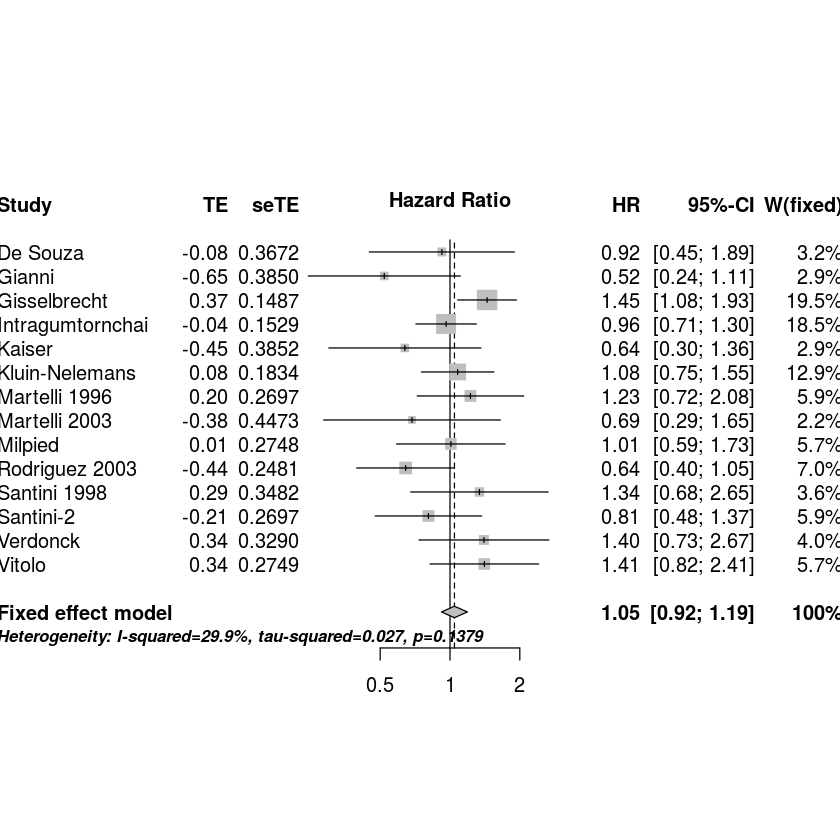

In [8]:
forest(meta1)

森林图中，第一列是研究的名称，对应的一般就是“作者+年份”，而第二列给出的就是效应值logHR，第三列给出的是其标准误差。第四列就是所谓的森林图，每行给出了研究的效应值及其95%置信区间，中间的灰色小方块的大小对应的是该研究的权重。下方给出了固定效应模型的汇总效应值和异质性分析的结果（$I^2$，$\tau^2$以及$p$-value）。

我们还可用烟囱图分析研究结果的分布情况，横轴是效应值，纵轴为效应值的标准误差，通过本图你能得到什么样的结论？

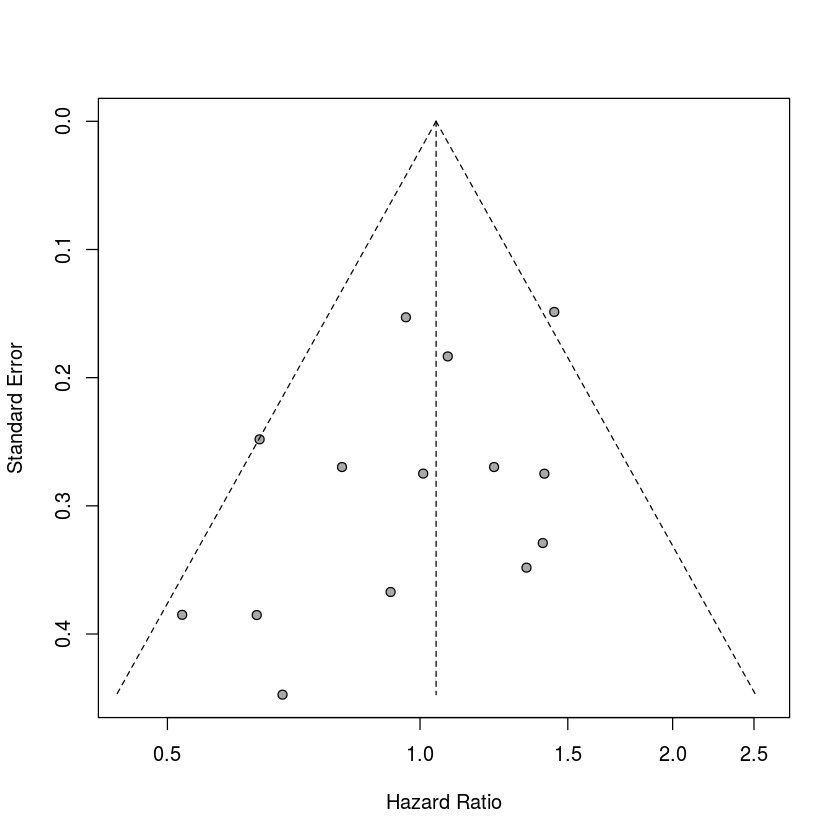

In [11]:
funnel(meta1)

### $\S$案例2： 侵袭性非霍奇金淋巴瘤的两种化疗方法的响应比较

仍然是这个研究，但这里研究的outcome换成了二元的变量，也就是响应（response）与否。这时候就必须采用对应的函数`metabin`了。

对于这种数据，每个研究都能写成$2 \times 2$列联表（contingency table）的形式：

|  | Event | No-Event |
| --- | :---: | :---: |
| Case | $a$ | $b$ |
| Control | $c$ | $d$ | 

对于这种类型的数据，有三种效应值：

- 风险比（risk ratio, RR）:
$$
\phi = \frac{a/(a+b)}{c/(c+d)}
$$
- odds ratio (OR):
$$
\psi = \frac{a/b}{c/d} = \frac{ad}{bc}
$$
- 风险差（risk difference, RD）：
$$
\eta = \frac{a}{a+b} - \frac{c}{c+d}
$$

使用比较广泛的是odds ratio，这主要是因为其对数值（logOR）的对称性。

大样本下，方差分别为：
$$
\begin{array}{lcl}
\widehat{var}(\log \hat{\phi}) &=& \frac{1}{a} + \frac{1}{c} - \frac{1}{a+b} - \frac{1}{c+d} \\
\widehat{var}(\log \hat{\psi}) &=& \frac{1}{a} + \frac{1}{b} + \frac{1}{c} + \frac{1}{d} \\
\widehat{var}(\log \hat{\eta}) &=& \frac{ab}{(a+b)^3} + \frac{cd}{(c+d)^3}
\end{array}
$$
各个效应值的__$(1-\alpha)$置信区间__为：
$$
\hat{\theta} \pm \mathbf{Z}_{1-\alpha/2} \operatorname{S.E.}(\hat{\theta})
$$
其中
$$
\operatorname{S.E.}(\hat{\theta}) = \sqrt{\widehat{\operatorname{var}}(\hat{\theta})}
$$
注意的是：这里的效应值$\hat{\theta}$都是对数尺度下的（log-scaled），也就是logRR, logOR, logRD。

当$a,b,c,d$中个别值为0的时候，我们可以适当转换后进行计算：
$$
\begin{array}{lcl}
\widehat{var}(\log \hat{\phi}) &=& \frac{1}{a+0.5} + \frac{1}{c+0.5} - \frac{1}{a+b+0.5} - \frac{1}{c+d+0.5} \\
\widehat{var}(\log \hat{\psi}) &=& \frac{1}{a+0.5} + \frac{1}{b+0.5} + \frac{1}{c+0.5} + \frac{1}{d+0.5} \\
\widehat{var}(\log \hat{\eta}) &=& \frac{(a+0.5)(b+0.5)}{(a+b+1)^3} + \frac{(c+0.5)(d+0.5)}{(c+d+1)^3}
\end{array}
$$

In [12]:
cr <- read.csv("data/hd-cr.csv", as.is=TRUE)
head(cr)

,study,crHDCT,nHDCT,crControl,nControl
1,De Souza,14,28,10,26
2,Gianni,46,48,35,50
3,Gisselbrecht,119,189,116,181
4,Intragumtornchai,10,23,9,25
5,Kaiser,110,158,97,154
6,Kluin-Nelemans,67,98,56,96


In [13]:
meta2 <- metabin(crHDCT, nHDCT, crControl, nControl, 
                 sm="OR", data=cr, studlab=study,
                 comb.random=FALSE, method="Inverse")
summary(meta2)

Number of studies combined: k = 14

                       OR           95%-CI    z  p-value
Fixed effect model 1.3228 [1.0999; 1.5909] 2.97   0.0030

Quantifying heterogeneity:
tau^2 = 0.0897; H = 1.30 [1.00; 1.78]; I^2 = 41.0% [0.0%; 68.6%]

Test of heterogeneity:
     Q d.f.  p-value
 22.03   13   0.0549

Details on meta-analytical method:
- Inverse variance method

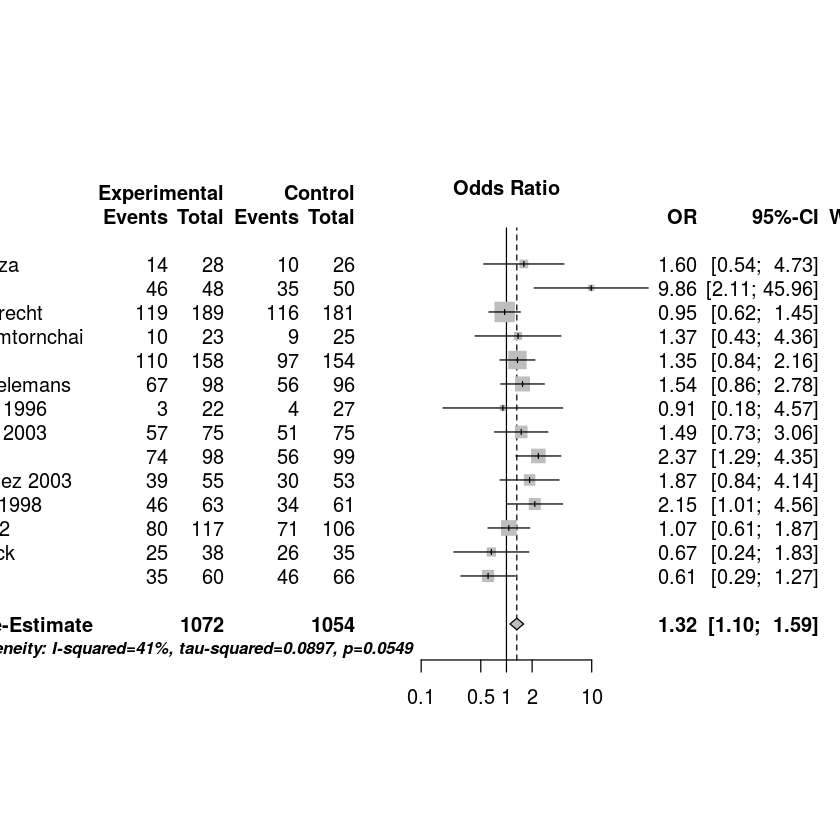

In [17]:
forest(meta2, text.fixed="Inverse-Estimate")

### 固定效应模型：OR值的Mantel-Haenszel（M-H）估计

如果采用OR作为效应值，权重的计算方法除了Inverse-Variance之外，还有Mantel-Haenszel（M-H）方法：
$$
w_k = \frac{b_k c_k}{n_k}
$$

这样汇总后的logOR为
$$
\hat{\psi}_{MH} = \frac{\sum_{k=1}^K w_k \hat{\psi}_k}{\sum_{k=1}^K w_k}
$$

In [16]:
meta3 <- update(meta2, method="MH")
summary(meta3)

Number of studies combined: k = 14

                       OR           95%-CI    z  p-value
Fixed effect model 1.3459 [1.1226; 1.6137] 3.21   0.0013

Quantifying heterogeneity:
tau^2 = 0.0900; H = 1.30 [1.00; 1.79]; I^2 = 41.1% [0.0%; 68.7%]

Test of heterogeneity:
     Q d.f.  p-value
 22.06   13   0.0544

Details on meta-analytical method:
- Mantel-Haenszel method

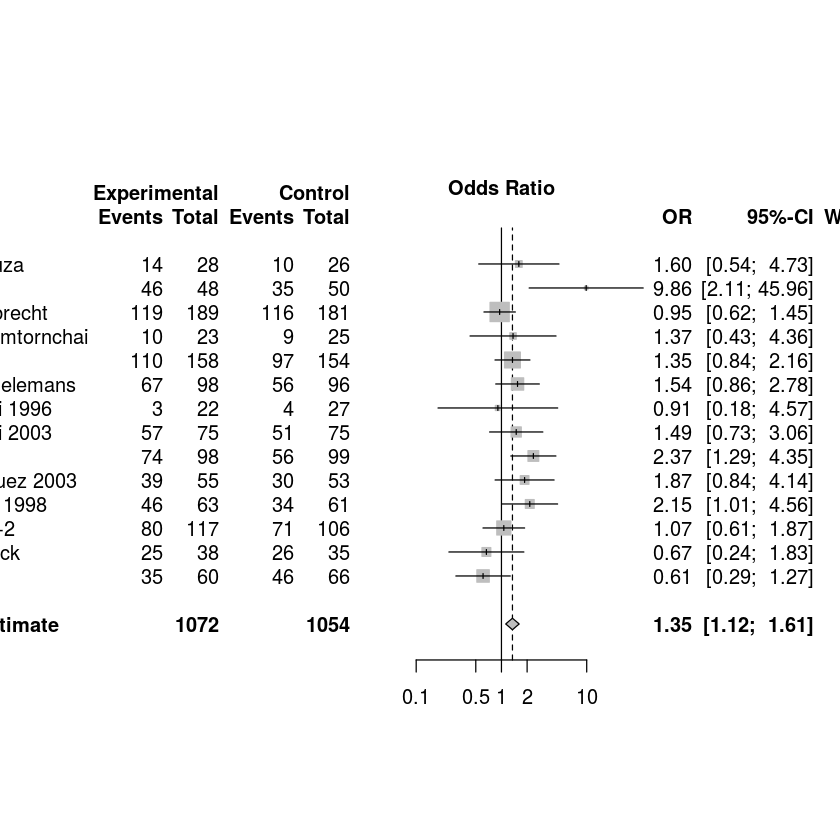

In [19]:
forest(meta3, hetstat=FALSE, text.fixed="MH-Estimate")